# Predicting Customer Churn 
___

### Objective: Predict customer churn in the telecommunications Industry. 

Preventing customer attrition, or churn, is a common business objective. Losing customers results in direct revenue loss, as well as the expenditure of resources to continually find new customers. Brands across all industries are looking for ways to build meaningful bonds with their customers in order to keep them engaged and loyal to the company. In the telecommunications industry, it's a particularly challenging problem as customers in most markets have access to several options.  

### The dataset: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn/home) 

The Telco Customer Churn dataset contains customer information from a telecommunications company. It includes general demographic information about the customer as well as the various services they were using. It was published by IBM in 2015. 
The raw data contains  7043 rows and 21 columns, with each row being a unique customer. The target variable is **Churn**, whether or not the customer left the company in the last 30 days.  

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import time

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.25)
sns.set_style('white')

C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Data Exploratoration and Cleaning

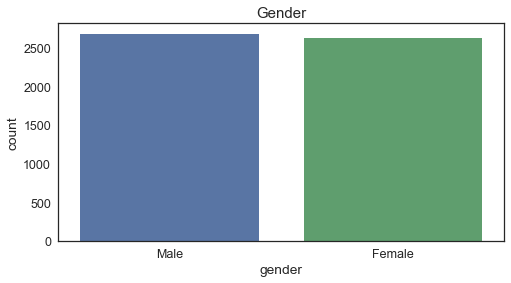

In [222]:
plt.figure(figsize=(8,4))
sns.countplot(x="gender", data=df);
plt.title('Gender')
plt.show()

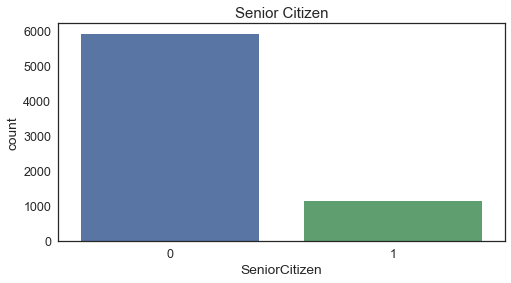

In [124]:
plt.figure(figsize=(8,4))
sns.countplot(x="SeniorCitizen", data=df);
plt.title('Senior Citizen')
plt.show()

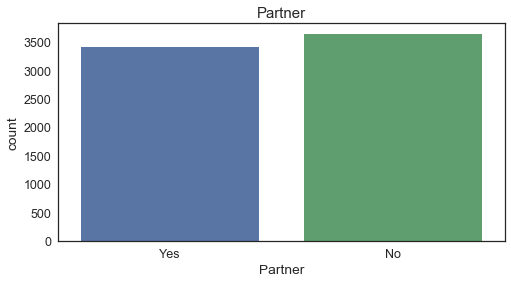

In [125]:
plt.figure(figsize=(8,4))
sns.countplot(x="Partner", data=df);
plt.title('Partner')
plt.show()

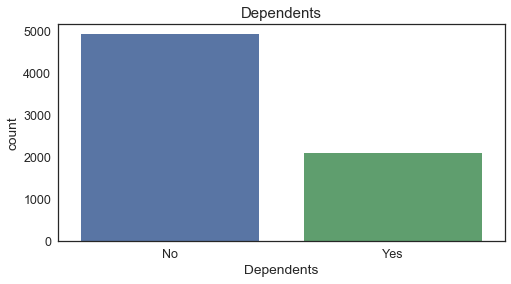

In [126]:
plt.figure(figsize=(8,4))
sns.countplot(x="Dependents", data=df);
plt.title('Dependents')
plt.show()

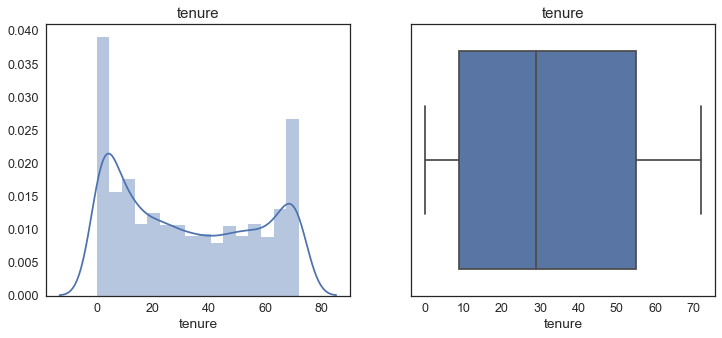

In [127]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(1, 2, 2)
sns.boxplot(df['tenure'])
plt.title('tenure')

plt.show()

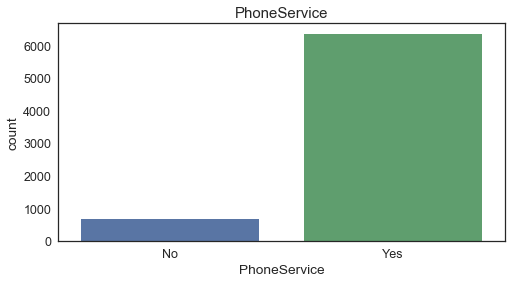

In [128]:
plt.figure(figsize=(8,4))
sns.countplot(x="PhoneService", data=df);
plt.title('PhoneService')


plt.show()

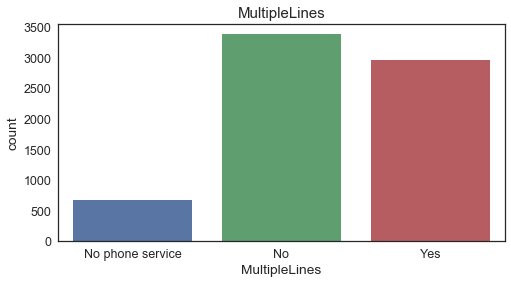

In [129]:
plt.figure(figsize=(8,4))
sns.countplot(x="MultipleLines", data=df);
plt.title('MultipleLines')


plt.show()

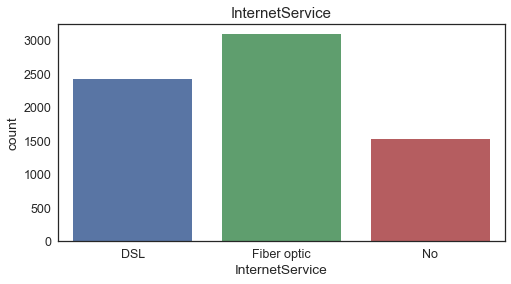

In [130]:
plt.figure(figsize=(8,4))
sns.countplot(x="InternetService", data=df);
plt.title('InternetService')
plt.show()

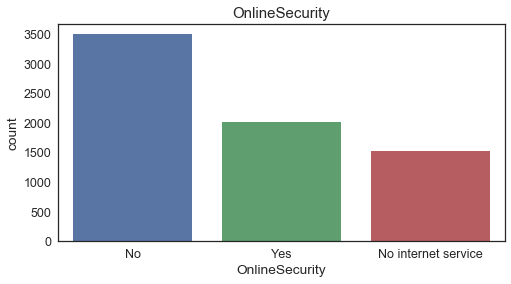

In [131]:
plt.figure(figsize=(8,4))
sns.countplot(x="OnlineSecurity", data=df);
plt.title('OnlineSecurity')
plt.show()

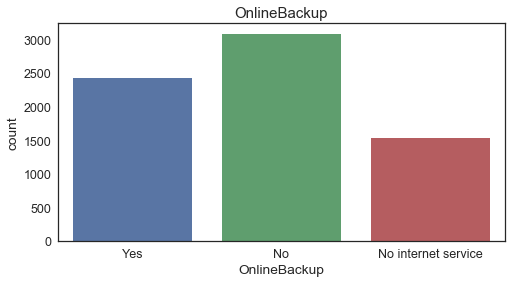

In [132]:
plt.figure(figsize=(8,4))
sns.countplot(x="OnlineBackup", data=df);
plt.title('OnlineBackup')
plt.show()

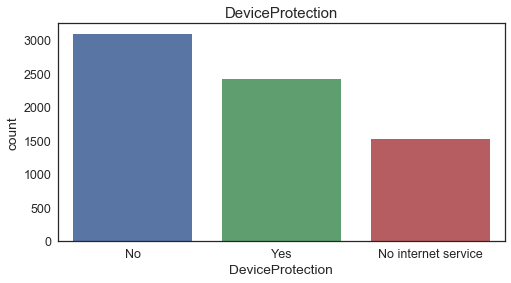

In [133]:
plt.figure(figsize=(8,4))
sns.countplot(x="DeviceProtection", data=df);
plt.title('DeviceProtection')
plt.show()

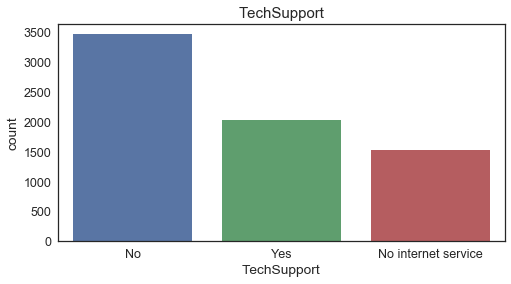

In [134]:
plt.figure(figsize=(8,4))
sns.countplot(x="TechSupport", data=df);
plt.title('TechSupport')


plt.show()

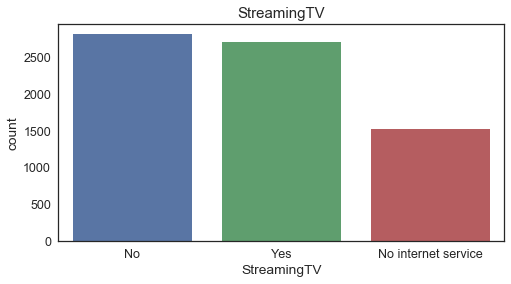

In [135]:
plt.figure(figsize=(8,4))
sns.countplot(x="StreamingTV", data=df);
plt.title('StreamingTV')
plt.show()

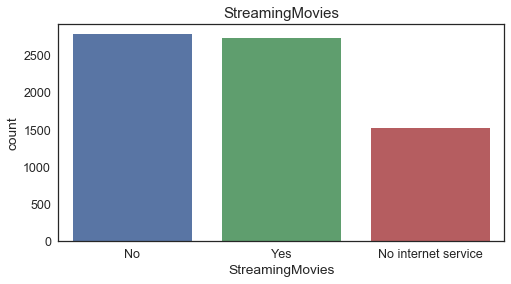

In [136]:
plt.figure(figsize=(8,4))
sns.countplot(x="StreamingMovies", data=df);
plt.title('StreamingMovies')
plt.show()

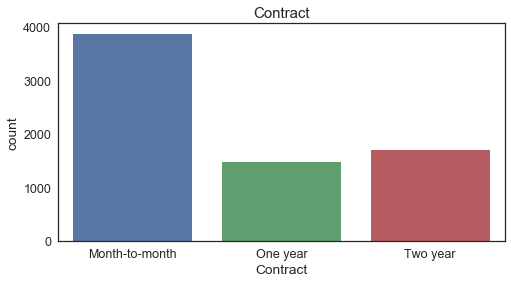

In [137]:
plt.figure(figsize=(8,4))
sns.countplot(x="Contract", data=df);
plt.title('Contract')
plt.show()

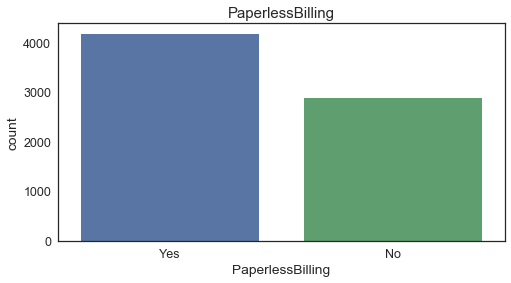

In [138]:
plt.figure(figsize=(8,4))
sns.countplot(x="PaperlessBilling", data=df);
plt.title('PaperlessBilling')
plt.show()

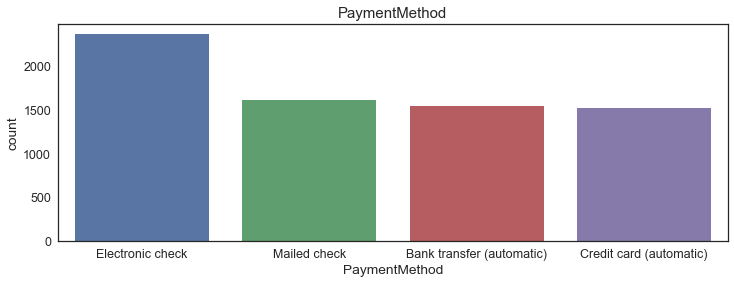

In [139]:
plt.figure(figsize=(12,4))
sns.countplot(x="PaymentMethod", data=df);
plt.title('PaymentMethod')
plt.show()

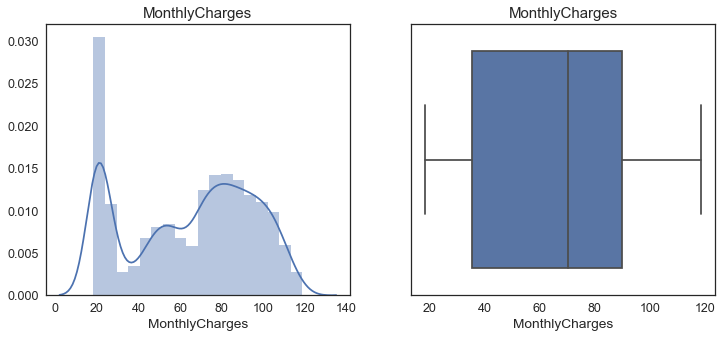

In [140]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.show()

In [5]:
# Total charges is missing some data
len(df[df['TotalCharges'] == ' '])

11

In [6]:
# Dropping rows that are missing total charges so we can convert to float
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

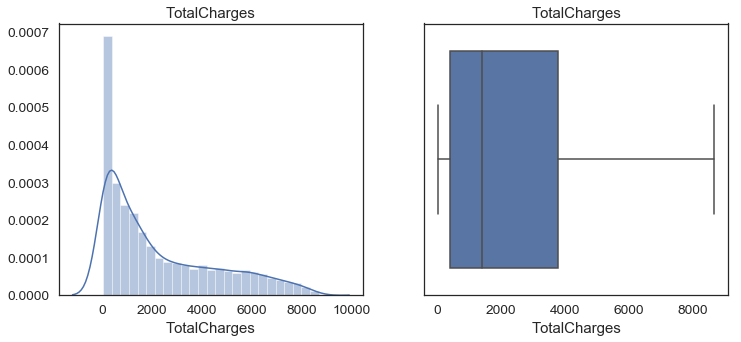

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.show()

# Explore the Target variable 

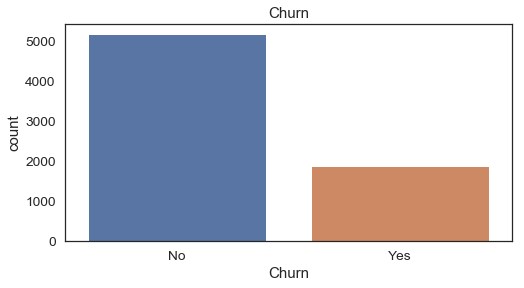

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x="Churn", data=df);
plt.title('Churn')


plt.show()

##### As PhoneService and SeniorCitizen are both very imbalanced variables, I will drop the subsets of customers who are senior citizens or who don't have phone service.

In [9]:
df = df[df['SeniorCitizen'] == 0 ]

In [10]:
df = df[df['PhoneService'] == 'Yes' ]

In [11]:
len(df[df['Churn'] == 'Yes'])

1267

In [12]:
len(df[df['Churn'] == 'No']) / len(df)

0.7615732028603689

In [13]:
df.shape

(5314, 21)

### To combat the class imbalance of the target variable, the dominant class will be randomly down-sampled to achieve a 50/50 split. 

In [14]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Churn']=='No']
df_minority = df[df['Churn']=='Yes']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1267,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Churn.value_counts()


Yes    1267
No     1267
Name: Churn, dtype: int64

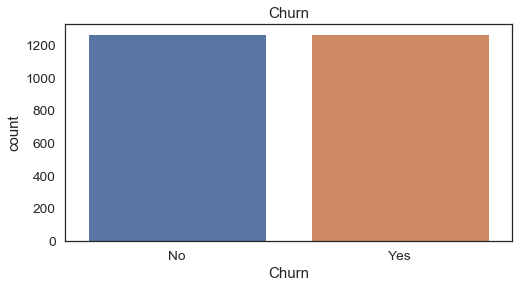

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x="Churn", data=df_downsampled);
plt.title('Churn')


plt.show()

### Benchmark of .5
# Feature Engineering and Selection

In [16]:
#Create dummies
df_downsampled = pd.get_dummies(data=df_downsampled, columns=['gender', 'Partner', 'Dependents','MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)
#Drop variables that won't affect target
X = df_downsampled.drop(['customerID', 'Churn', 'SeniorCitizen', 'PhoneService'], axis=1)
df_downsampled['Churn'] = np.where(df_downsampled['Churn'] == 'No', 0, 1)
y = df_downsampled['Churn'].values.reshape(-1, 1)

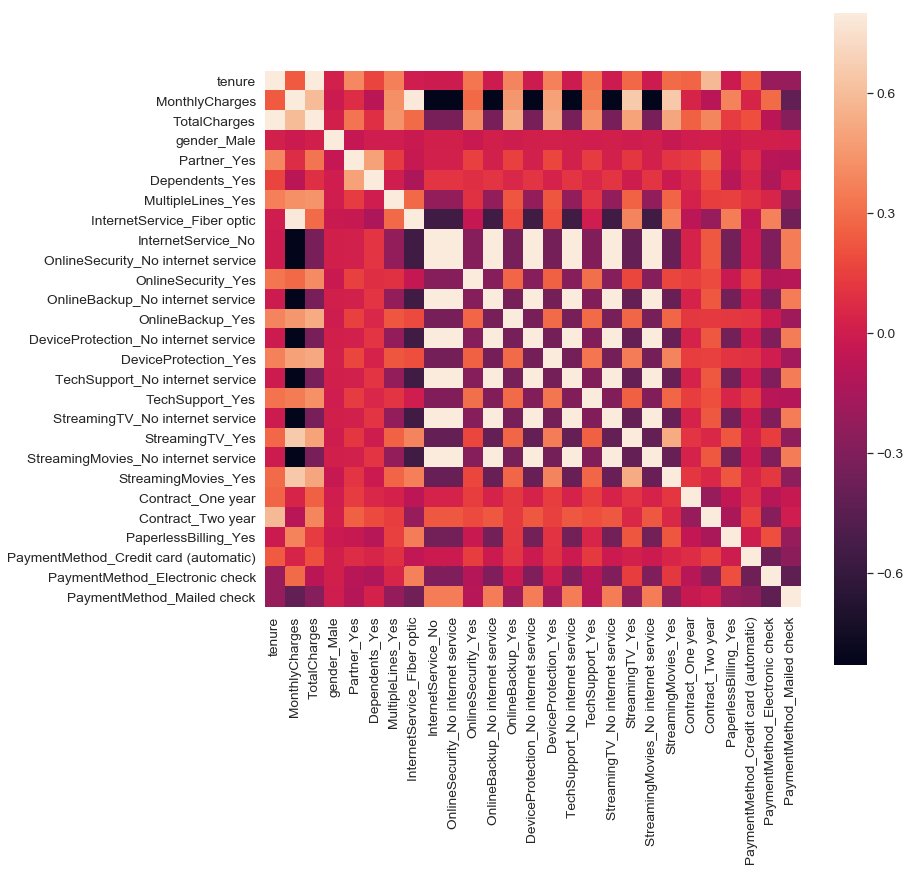

In [17]:
corrmat = X.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Create training and testing split

In [18]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
y_test = y_test.flatten()

# Modeling

# Naive Bayes

In [99]:
start_time = time.clock()
# Instantiate and fit model
bnb = BernoulliNB()
bnb.fit(X, y)

#Get Y predictions 
y_pred = bnb.predict(X)

print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))
# Display our results.
print("\nNumber of mislabeled points out of a total {} points : {}".format(
    df_downsampled.shape[0],
    (y_pred != df_downsampled['Churn']).sum().sum()
))


Runtime: 0.01 seconds

Number of mislabeled points out of a total 2534 points : 714


In [121]:
cv_score =cross_val_score(bnb, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.76771654 0.76377953 0.70866142 0.70866142 0.71653543 0.69291339
 0.67322835 0.68253968 0.71428571 0.74206349]
cross validation mean: 0.7170384951881015
cross validation range: 0.0944881889763779


In [101]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

In [102]:
print(bnb.score(X_test, y_test))

0.7161629434954008


In [103]:
confusion_matrix(y_test, y_pred)

array([[212, 165],
       [ 51, 333]], dtype=int64)

In [70]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 165
Type 2 error (false negative): 51
Sensitivity: 0.8671875
Specificity: 0.5623342175066313


# KNN

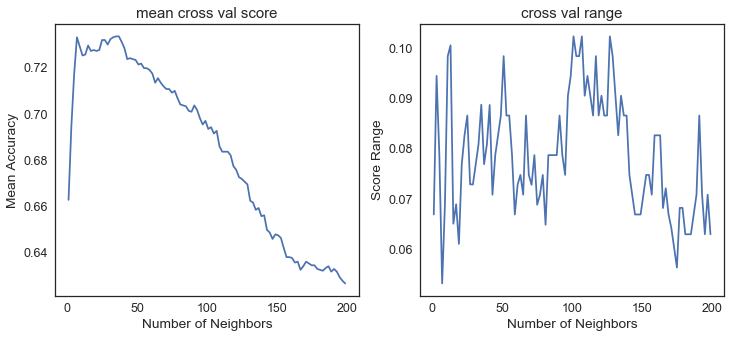

In [185]:
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')


plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score Range')


plt.show()

In [42]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
17,35,0.733652,0.088770
18,37,0.733652,0.076928


In [115]:
neighbors = KNeighborsClassifier(n_neighbors=37)
neighbors.fit(X_train,y_train)
neighbors.score(X_test,y_test)

0.7306176084099869

In [116]:
cv_score =cross_val_score(neighbors, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.7519685  0.73622047 0.69291339 0.74409449 0.75590551 0.72047244
 0.69685039 0.73015873 0.73809524 0.76984127]
cross validation mean: 0.7336520434945631
cross validation range: 0.07692788401449824


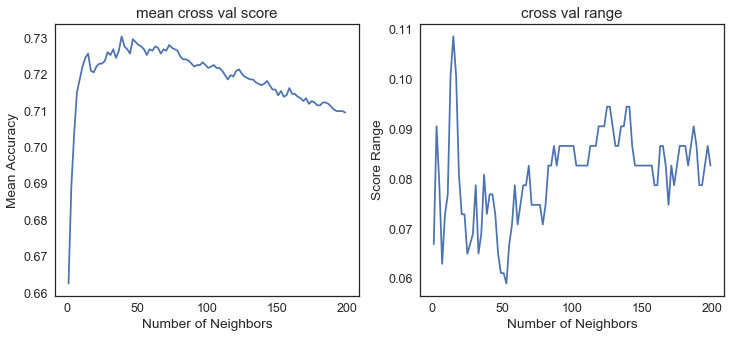

In [186]:
#with distance weighting
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score Range')

plt.show()

In [46]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
19,39,0.730474,0.072991


In [47]:
no_neighbors[no_neighbors['score_range'] == no_neighbors['score_range'].min()]

,k,mean_score,score_range
26,53,0.727722,0.059055


In [117]:
start_time = time.clock()

neighbors = KNeighborsClassifier(n_neighbors=53, weights='distance')
y_pred = neighbors.fit(X_train,y_train).predict(X_test)

print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

#confusion matrix
confusion_matrix(y_test, y_pred)


Runtime: 0.02 seconds


array([[275, 102],
       [114, 270]], dtype=int64)

In [118]:
neighbors.score(X_test,y_test)

0.7161629434954008

In [119]:
cv_score =cross_val_score(neighbors, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.74409449 0.72047244 0.7007874  0.73622047 0.75984252 0.70472441
 0.70472441 0.71428571 0.73412698 0.75793651]
cross validation mean: 0.7277215348081489
cross validation range: 0.05905511811023623


In [120]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 102
Type 2 error (false negative): 114
Sensitivity: 0.703125
Specificity: 0.7294429708222812


# Decision Tree

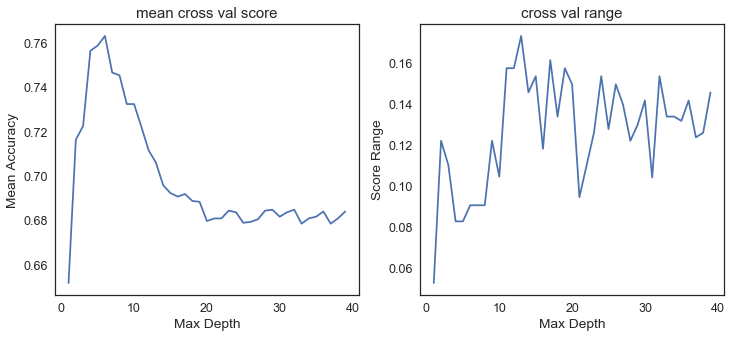

In [187]:
#Tuning Max Depth
param_tune = []
for i in range(1, 40):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('Max Depth')
plt.ylabel('Score Range')

plt.show()

In [52]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
5,6,0.76283,0.090551


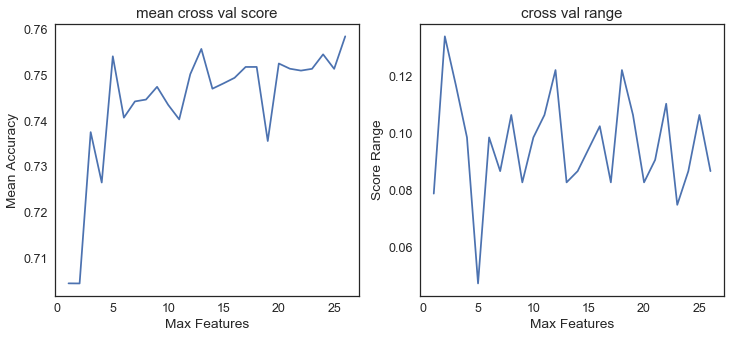

In [188]:
#Tuning Max features
param_tune = []
for i in range(1, X.shape[1]):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('Max Features')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('Max Features')
plt.ylabel('Score Range')

plt.show()

In [56]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
20,21,0.762811,0.082677


In [73]:
start_time = time.clock()
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=3, max_features=X.shape[1])
y_pred = decision_tree.fit(X_train, y_train).predict(X_test)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y_test, y_pred)


Runtime: 0.01 seconds


array([[305,  72],
       [152, 232]], dtype=int64)

In [74]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 72
Type 2 error (false negative): 152
Sensitivity: 0.6041666666666666
Specificity: 0.8090185676392573


In [123]:
cv_score =cross_val_score(decision_tree, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.78346457 0.7519685  0.72834646 0.68503937 0.72440945 0.67322835
 0.70866142 0.70634921 0.74206349 0.72222222]
cross validation mean: 0.7225753030871142
cross validation range: 0.11023622047244097


# Random Forest

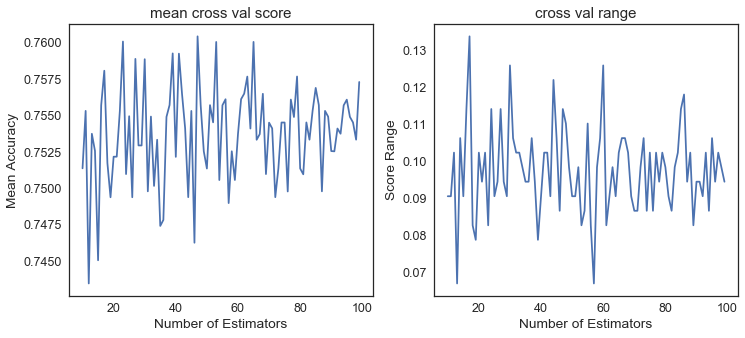

In [189]:
#Tune number of estimators
param_tune = []
for i in np.arange(10, 100):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, max_depth=8, max_features=None)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('Number of Estimators')
plt.ylabel('Score Range')

plt.show()

In [60]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
11,21,0.762414,0.086614


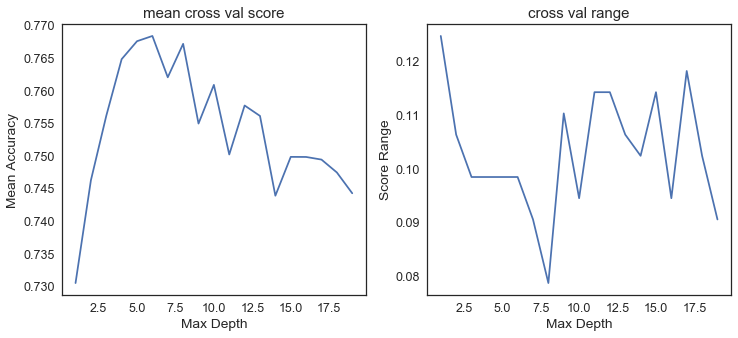

In [190]:
#Tune max depth 
param_tune = []
for i in np.arange(1, 20):
    rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('Max Depth')
plt.ylabel('Score Range')

plt.show()

In [62]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
3,4,0.7711,0.110236


In [63]:
# tume max features
param_tune = []
for i in [None, 'sqrt', 'log2']:
    rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=7, max_features=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

param_tune

,parameter,mean_score,score_range
0,None,0.758477,0.102362
1,sqrt,0.763220,0.094488
2,log2,0.765570,0.110236


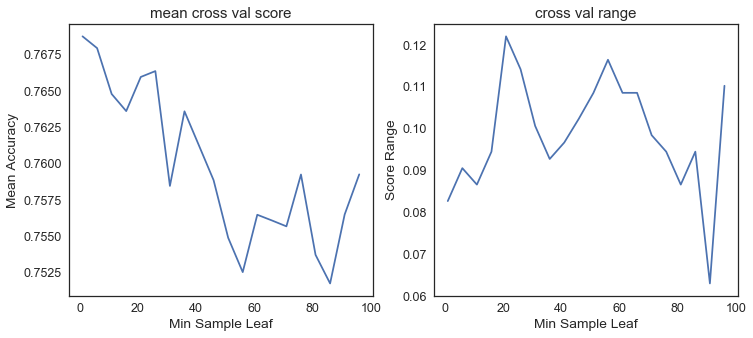

In [191]:
# tune min sample leaf
param_tune = []
for i in np.arange(1, 100, 5):
    rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=7, max_features='log2', min_samples_leaf=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('Min Sample Leaf')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('Min Sample Leaf')
plt.ylabel('Score Range')

plt.show()

In [65]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
2,11,0.771097,0.098425


In [134]:
start_time = time.clock()
rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=7, max_features='log2', min_samples_leaf=1)
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y_test, y_pred)


Runtime: 0.08 seconds


array([[276, 101],
       [ 86, 298]], dtype=int64)

In [136]:
cv_score =cross_val_score(rfc, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.81889764 0.77952756 0.74015748 0.74409449 0.7992126  0.72834646
 0.72834646 0.76190476 0.75793651 0.79365079]
cross validation mean: 0.7652074740657417
cross validation range: 0.09055118110236215


In [137]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 101
Type 2 error (false negative): 86
Sensitivity: 0.7760416666666666
Specificity: 0.7320954907161804


# Logistic Regression

In [39]:
start_time = time.clock()
lr = LogisticRegression(C=1e9)
                      
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lr.predict(X_test)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


print('\n Percentage accuracy')
print(lr.score(X_test, y_test))

confusion_matrix(y_test, y_pred)

Coefficients
[[-5.48136284e-02  1.85738874e-02  2.38236647e-04  7.90269932e-03
  -3.44876396e-01  2.10628828e-02  4.30025222e-02  3.05330675e-01
  -4.61161690e-02 -4.61161690e-02 -1.66099696e-01 -4.61161690e-02
  -1.99402439e-01 -4.61161690e-02 -1.02945652e-01 -4.61161690e-02
  -5.06969766e-01 -4.61161690e-02  4.30702452e-02 -4.61161690e-02
   1.53784545e-01 -6.78859682e-01 -1.31429256e+00  3.61629902e-01
  -4.18411418e-01  1.75669055e-01 -1.48340302e-01]]
[-0.08964106]

Runtime: 0.02 seconds

 Percentage accuracy
0.7490144546649146


array([[277, 100],
       [ 91, 293]], dtype=int64)

In [40]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 100
Type 2 error (false negative): 91
Sensitivity: 0.7630208333333334
Specificity: 0.7347480106100795


In [41]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,Contract_Two year,-1.314293,1.314293
1,Contract_One year,-0.678860,0.678860
2,TechSupport_Yes,-0.506970,0.506970
3,PaymentMethod_Credit card (automatic),-0.418411,0.418411
4,PaperlessBilling_Yes,0.361630,0.361630
5,Partner_Yes,-0.344876,0.344876
6,InternetService_Fiber optic,0.305331,0.305331
7,OnlineBackup_Yes,-0.199402,0.199402
8,PaymentMethod_Electronic check,0.175669,0.175669
9,OnlineSecurity_Yes,-0.166100,0.166100


In [42]:
cv_score =cross_val_score(lr, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.81496063 0.79527559 0.75590551 0.73622047 0.7992126  0.74015748
 0.72047244 0.71825397 0.73809524 0.76190476]
cross validation mean: 0.7580458692663417
cross validation range: 0.09670666166729158


In [82]:
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(lr)
selector = selector.fit(X, y)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
26,PaymentMethod_Mailed check,1
22,Contract_Two year,1
21,Contract_One year,1
20,StreamingMovies_Yes,1
4,Partner_Yes,1
19,StreamingMovies_No internet service,1
17,StreamingTV_No internet service,1
7,InternetService_Fiber optic,1
16,TechSupport_Yes,1
15,TechSupport_No internet service,1


# Logistic Regression with Ridge Regularization

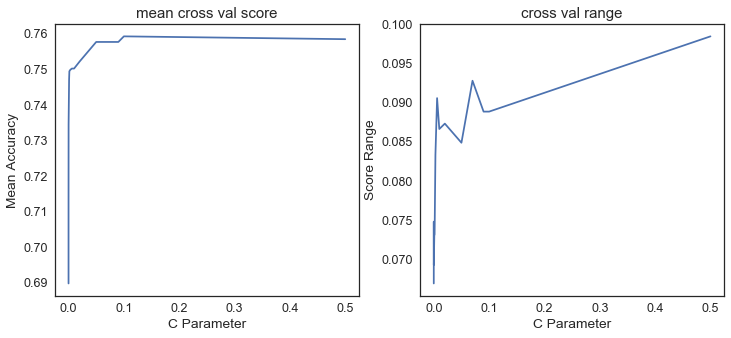

In [192]:
# tune l2 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.0015, 0.003, 0.006, 0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.5]:
#for i in [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.01]:
    ridge = LogisticRegression(penalty='l2', C=i)
    ridge.fit(X, y)
    score = cross_val_score(ridge, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('C Parameter')
plt.ylabel('Score Range')

plt.show()

In [67]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
12,0.1,0.759243,0.088833


In [43]:
start_time = time.clock()
ridge = LogisticRegression(penalty='l2', C=0.01)
                      
fit = ridge.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = ridge.predict(X_test)

print('\n Percentage accuracy')
print(ridge.score(X_test, y_test))
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


confusion_matrix(y_test, y_pred)

Coefficients
[[-0.0730773   0.02146744  0.00027319 -0.0180065  -0.12632967 -0.07406468
   0.04230398  0.14478864 -0.0552993  -0.0552993  -0.13255568 -0.0552993
  -0.08312377 -0.0552993  -0.07375451 -0.0552993  -0.24009355 -0.0552993
   0.0014158  -0.0552993   0.01862043 -0.11838612 -0.18503894  0.16492533
  -0.12816655  0.15927478 -0.08137516]]
[-0.0567018]

 Percentage accuracy
0.7371879106438897

Runtime: 0.02 seconds


array([[282,  95],
       [105, 279]], dtype=int64)

In [44]:
cv_score =cross_val_score(ridge, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.7992126  0.77559055 0.7519685  0.71653543 0.77952756 0.71259843
 0.72440945 0.71825397 0.73809524 0.78571429]
cross validation mean: 0.7501906011748531
cross validation range: 0.08661417322834652


In [45]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 95
Type 2 error (false negative): 105
Sensitivity: 0.7265625
Specificity: 0.7480106100795756


# Logistic Regression with Lasso Regularization

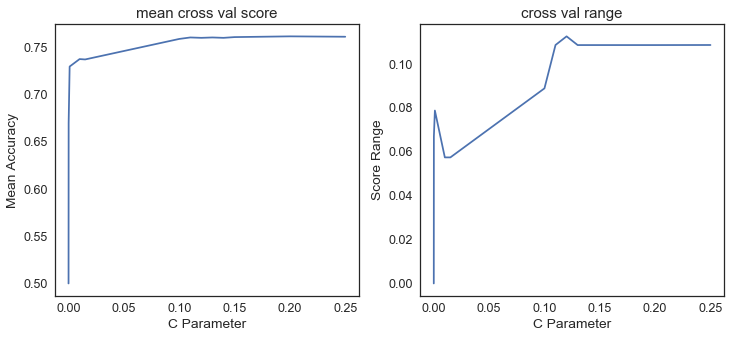

In [193]:
# tune l1 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25]:
    lasso = LogisticRegression(penalty='l1', C=i)
    lasso.fit(X, y)
    score = cross_val_score(lasso, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('C Parameter')
plt.ylabel('Score Range')

plt.show()

In [62]:
param_tune

,parameter,mean_score,score_range
0,0.000001,0.500000,0.000000
1,0.000010,0.500000,0.000000
2,0.000100,0.669679,0.066929
3,0.001000,0.729681,0.078740
4,0.001000,0.729284,0.078740
5,0.010000,0.737183,0.057399
6,0.015000,0.736789,0.057399
7,0.100000,0.758858,0.092770
8,0.110000,0.760830,0.100644
9,0.120000,0.760027,0.116454


In [46]:
start_time = time.clock()

lasso = LogisticRegression(penalty='l1', C=0.01)
                      
fit = lasso.fit(X_test, y_test)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lasso.predict(X_test)

print('\n Percentage accuracy')
print(lasso.score(X_test, y_test))
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y_test, y_pred)

Coefficients
[[-0.09030705  0.02106864  0.00045953  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[0.]

 Percentage accuracy
0.721419185282523

Runtime: 0.01 seconds


array([[250, 127],
       [ 85, 299]], dtype=int64)

In [47]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 127
Type 2 error (false negative): 85
Sensitivity: 0.7786458333333334
Specificity: 0.6631299734748011


In [48]:
cv_score =cross_val_score(lasso, X, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.76771654 0.7519685  0.72440945 0.72834646 0.7480315  0.71653543
 0.71259843 0.71031746 0.75       0.76190476]
cross validation mean: 0.737182852143482
cross validation range: 0.05739907511561049


In [90]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,tenure,-0.090061,0.090061
1,MonthlyCharges,0.021067,0.021067
2,TotalCharges,0.000457,0.000457
3,TechSupport_No internet service,0.000000,0.000000
4,PaymentMethod_Electronic check,0.000000,0.000000
5,PaymentMethod_Credit card (automatic),0.000000,0.000000
6,PaperlessBilling_Yes,0.000000,0.000000
7,Contract_Two year,0.000000,0.000000
8,Contract_One year,0.000000,0.000000
9,StreamingMovies_Yes,0.000000,0.000000


# Using Lasso for Feature selection

In [49]:
X_lasso = X[['tenure', 'MonthlyCharges', 'TotalCharges']]

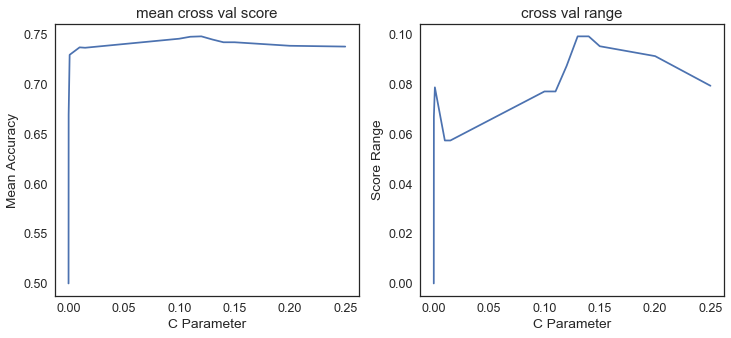

In [194]:
# tune l1 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25]:
    lasso = LogisticRegression(penalty='l1', C=i)
    score = cross_val_score(lasso, X_lasso, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('C Parameter')
plt.ylabel('Score Range')

plt.show()

In [50]:
cv_score =cross_val_score(lasso, X_lasso, y, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.76771654 0.7519685  0.72440945 0.72834646 0.7480315  0.71653543
 0.71259843 0.71031746 0.75       0.76190476]
cross validation mean: 0.737182852143482
cross validation range: 0.05739907511561049


# SVM

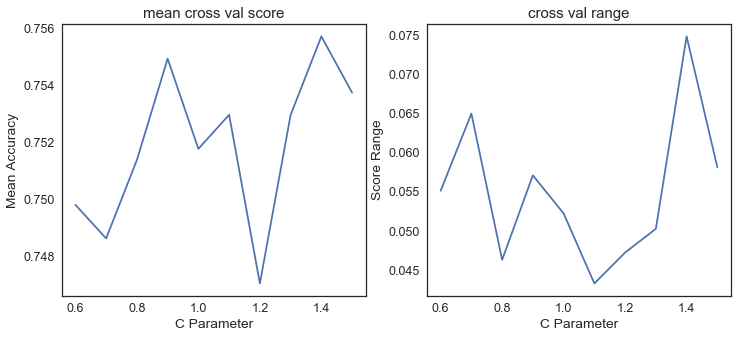

In [199]:
# tune C parameter
param_tune = []
#for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.15, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 10]:
#for i in [0.01, 0.015, .05, 0.1, 0.15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]:
for i in [.6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]:
    
    svm = SVC(C=i,  kernel='linear')    
    score = cross_val_score(svm, X, y, cv=5)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('C Parameter')
plt.ylabel('Score Range')

plt.show()

In [200]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
8,1.4,0.755706,0.074803


In [128]:
param_tune[param_tune['score_range'] == param_tune['score_range'].min()]

,parameter,mean_score,score_range
5,1.1,0.752952,0.043307


In [ ]:
# tune 
#param_tune = []
#for i in ['linear', 'poly', 'rbf']:
#    svm = SVC(C=.9, kernel=i)    
#    svm.fit(X, y)
#    score = cross_val_score(svm, X, y, cv=5)
#    mean_score = score.mean()
#    score_range = score.max() - score.min()
#    param_tune.append([i, mean_score, score_range])

#param_tune = pd.DataFrame(param_tune)
#param_tune.columns = ['parameter', 'mean_score', 'score_range']

#param_tune

In [ ]:
y_1d = df_downsampled['Churn']
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 0.85, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.grid_scores_

In [ ]:
svc_param_selection(X, y_1d, 5)

In [ ]:
svm = SVC(C=1, kernel='rbf', gamma=0.01)
cross_val_score(svm, X, y, cv=5)

In [56]:
start_time = time.clock()

svm = SVC(C=1.1, kernel='linear')
y_pred = svm.fit(X_train, y_train).predict(X_test)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y_test, y_pred)


Runtime: 407.72 seconds


array([[303,  74],
       [130, 254]], dtype=int64)

In [57]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 74
Type 2 error (false negative): 130
Sensitivity: 0.6614583333333334
Specificity: 0.8037135278514589


In [58]:
cv_score =cross_val_score(svm, X, y, cv=5)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.77952756 0.73622047 0.7687747  0.74110672 0.73913043]
cross validation mean: 0.7529519778407145
cross validation range: 0.04330708661417315


In [96]:
svm = SVC(C=1.1, kernel='linear')
cross_val_score(svm, X, y, cv=5)

array([0.78543307, 0.74015748, 0.75296443, 0.74703557, 0.73320158])

# Gradient Boost 

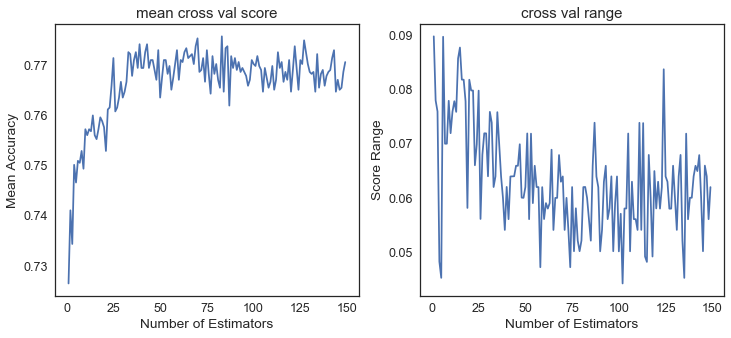

In [196]:
# tune n_estimators
param_tune = []
for i in np.arange(1, 150):
    
    boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=i, max_depth=8, min_samples_split=450, min_samples_leaf=42,max_features='sqrt',subsample=0.7)
    score = cross_val_score(boost, X, y, cv=5)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')
plt.xlabel('Number of Estimators')
plt.ylabel('Score Range')

plt.show()

In [156]:
param_tune[param_tune['score_range'] == param_tune['score_range'].min()]

,parameter,mean_score,score_range
66,67,0.771485,0.046233


In [155]:
y_1d = df_downsampled['Churn']
# Find number of estimators
param_test1 = {'max_depth': np.arange(2,16)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=67, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y_1d)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77148, std: 0.02084, params: {'max_depth': 2},
  mean: 0.77187, std: 0.02113, params: {'max_depth': 3},
  mean: 0.77109, std: 0.02097, params: {'max_depth': 4},
  mean: 0.76477, std: 0.02444, params: {'max_depth': 5},
  mean: 0.77306, std: 0.02390, params: {'max_depth': 6},
  mean: 0.76990, std: 0.01961, params: {'max_depth': 7},
  mean: 0.76990, std: 0.02018, params: {'max_depth': 8},
  mean: 0.76674, std: 0.02340, params: {'max_depth': 9},
  mean: 0.76832, std: 0.02356, params: {'max_depth': 10},
  mean: 0.77069, std: 0.02332, params: {'max_depth': 11},
  mean: 0.76950, std: 0.02459, params: {'max_depth': 12},
  mean: 0.77109, std: 0.02131, params: {'max_depth': 13},
  mean: 0.77147, std: 0.02411, params: {'max_depth': 14},
  mean: 0.77266, std: 0.02601, params: {'max_depth': 15}],
 {'max_depth': 6},
 0.7730556160717064)

In [167]:
param_test2 = {'min_samples_split': np.arange(50,1001,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=67, max_depth=8, min_samples_leaf=50, max_features='sqrt', subsample=0.7), 
param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch2.fit(X,y_1d)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76240, std: 0.02630, params: {'min_samples_split': 50},
  mean: 0.76319, std: 0.02516, params: {'min_samples_split': 60},
  mean: 0.76675, std: 0.02085, params: {'min_samples_split': 70},
  mean: 0.76202, std: 0.01974, params: {'min_samples_split': 80},
  mean: 0.76477, std: 0.02221, params: {'min_samples_split': 90},
  mean: 0.76517, std: 0.01977, params: {'min_samples_split': 100},
  mean: 0.76438, std: 0.02166, params: {'min_samples_split': 110},
  mean: 0.76832, std: 0.02396, params: {'min_samples_split': 120},
  mean: 0.76990, std: 0.02191, params: {'min_samples_split': 130},
  mean: 0.76556, std: 0.02003, params: {'min_samples_split': 140},
  mean: 0.76674, std: 0.01984, params: {'min_samples_split': 150},
  mean: 0.76990, std: 0.02191, params: {'min_samples_split': 160},
  mean: 0.75806, std: 0.02320, params: {'min_samples_split': 170},
  mean: 0.76241, std: 0.02014, params: {'min_samples_split': 180},
  mean: 0.76359, std: 0.02043, params: {'min_samples_split': 190},


In [168]:
param_test3 = {'min_samples_leaf': np.arange(20,71)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, n_estimators=67, max_depth=8, max_features='sqrt', subsample=0.7), 
param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch3.fit(X,y_1d)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76675, std: 0.01931, params: {'min_samples_leaf': 20},
  mean: 0.77543, std: 0.02090, params: {'min_samples_leaf': 21},
  mean: 0.77267, std: 0.02630, params: {'min_samples_leaf': 22},
  mean: 0.76793, std: 0.01852, params: {'min_samples_leaf': 23},
  mean: 0.77109, std: 0.02280, params: {'min_samples_leaf': 24},
  mean: 0.76911, std: 0.02234, params: {'min_samples_leaf': 25},
  mean: 0.77267, std: 0.02083, params: {'min_samples_leaf': 26},
  mean: 0.77187, std: 0.02100, params: {'min_samples_leaf': 27},
  mean: 0.76556, std: 0.01997, params: {'min_samples_leaf': 28},
  mean: 0.77030, std: 0.01830, params: {'min_samples_leaf': 29},
  mean: 0.76873, std: 0.01373, params: {'min_samples_leaf': 30},
  mean: 0.76675, std: 0.02054, params: {'min_samples_leaf': 31},
  mean: 0.76596, std: 0.02018, params: {'min_samples_leaf': 32},
  mean: 0.77148, std: 0.02205, params: {'min_samples_leaf': 33},
  mean: 0.76832, std: 0.02413, params: {'min_samples_leaf': 34},
  mean: 0.76754, std: 0.0

In [169]:
param_test5 = {'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=67,max_depth=8,min_samples_split=500, min_samples_leaf=21,max_features='sqrt'),
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y_1d)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.77069, std: 0.02196, params: {'subsample': 0.5},
  mean: 0.77306, std: 0.02383, params: {'subsample': 0.55},
  mean: 0.77030, std: 0.01948, params: {'subsample': 0.6},
  mean: 0.76911, std: 0.02229, params: {'subsample': 0.65},
  mean: 0.76990, std: 0.02330, params: {'subsample': 0.7},
  mean: 0.77345, std: 0.02310, params: {'subsample': 0.75},
  mean: 0.76990, std: 0.02041, params: {'subsample': 0.8},
  mean: 0.77069, std: 0.02443, params: {'subsample': 0.85},
  mean: 0.76359, std: 0.01912, params: {'subsample': 0.9},
  mean: 0.76792, std: 0.02551, params: {'subsample': 0.95},
  mean: 0.76674, std: 0.02233, params: {'subsample': 1}],
 {'subsample': 0.75},
 0.773449316859108)

In [19]:
start_time = time.clock()

boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=67, max_depth=8, min_samples_split=500, min_samples_leaf=21,max_features='sqrt',subsample=0.75)
y_pred = boost.fit(X_train, y_train).predict(X_test)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


confusion_matrix(y_test, y_pred)


Runtime: 0.11 seconds


array([[296,  81],
       [ 90, 294]], dtype=int64)

In [20]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 81
Type 2 error (false negative): 90
Sensitivity: 0.765625
Specificity: 0.7851458885941645


In [21]:
y_1d = df_downsampled['Churn']
cv_score =cross_val_score(boost, X, y_1d, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.83858268 0.7992126  0.7480315  0.77952756 0.81102362 0.7480315
 0.74409449 0.78174603 0.75396825 0.79365079]
cross validation mean: 0.7797869016372954
cross validation range: 0.0944881889763779


## Plot SHAP values for feature importance 

In [23]:
import shap

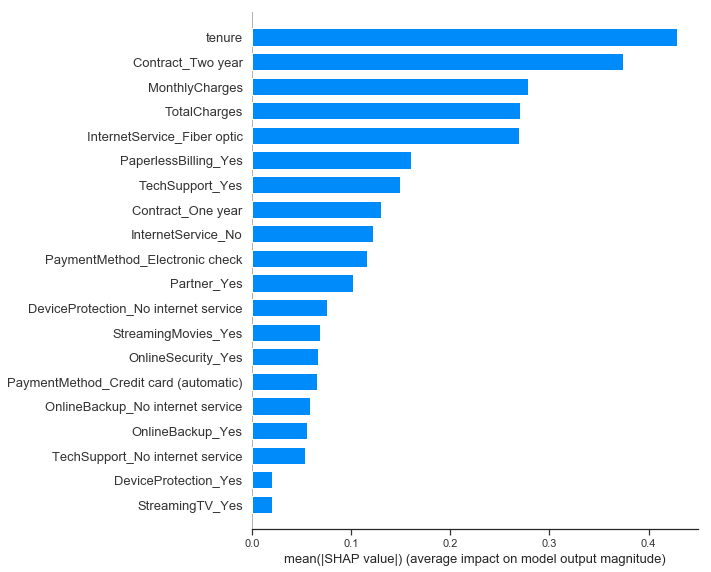

In [24]:
shap_values = shap.TreeExplainer(boost).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

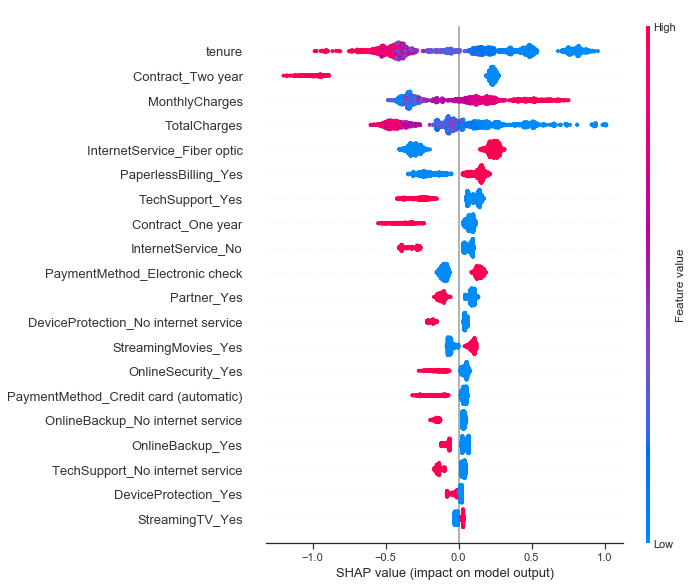

In [25]:
shap.summary_plot(shap_values, X_train)

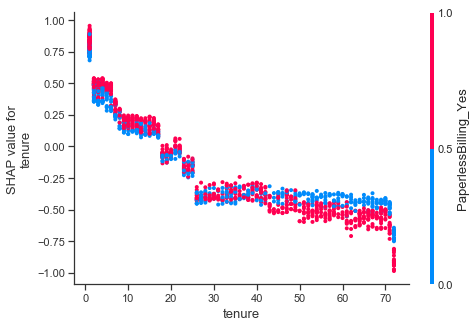

In [27]:
shap.dependence_plot('tenure', shap_values, X_train)

# PCA

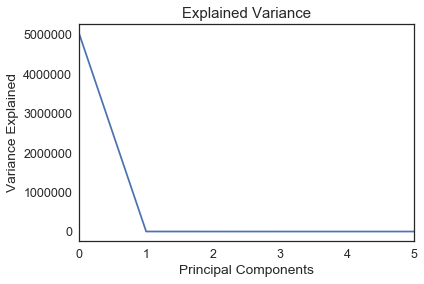

In [208]:
Xt = X.T
Cx = np.cov(Xt)
#print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.title('Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.xlim((0, 5))
plt.show()

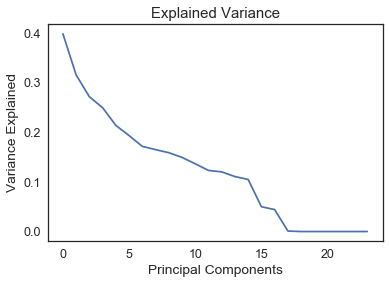

In [198]:
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit(X)
plt.plot(X_pca.explained_variance_[3:])
plt.title('Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

plt.show()

In [81]:
sklearn_pca = PCA(n_components=2)
pca_components = sklearn_pca.fit_transform(X)

In [83]:
cv_score =cross_val_score(boost, pca_components, y_1d, cv=10)
cv_range = cv_score.max() - cv_score.min()
print(cv_score)
print('cross validation mean: {}'.format(cv_score.mean()))
print('cross validation range: {}'.format(cv_range))

[0.77165354 0.76771654 0.74409449 0.74409449 0.76771654 0.71259843
 0.73622047 0.75       0.74206349 0.75      ]
cross validation mean: 0.7486157980252468
cross validation range: 0.05905511811023623


In [84]:
# create training and testing vars with PCA components
X_train, X_test, y_train, y_test = train_test_split(pca_components, y, test_size=0.3, random_state=1)
y_test = y_test.flatten()

In [85]:
start_time = time.clock()

boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=67, max_depth=8, min_samples_split=450, min_samples_leaf=42,max_features='sqrt',subsample=0.7)
y_pred = boost.fit(X_train, y_train).predict(X_test)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


confusion_matrix(y_test, y_pred)


Runtime: 0.08 seconds


array([[286,  91],
       [100, 284]], dtype=int64)

In [86]:
confusion = confusion_matrix(y_test, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 91
Type 2 error (false negative): 100
Sensitivity: 0.7395833333333334
Specificity: 0.7586206896551724


# Results

In [209]:
results = pd.read_csv('predicting_churn_results.csv')

In [210]:
results

,model,cross_val_mean,cross_val_range,type_1_error,type_2_error,sensitivity,specificity,run_time
0,naive bayes,0.717038,0.094488,165,51,0.867188,0.562334,0.01
1,knn,0.727722,0.059055,102,114,0.703125,0.729443,0.02
2,decision tree,0.722575,0.110236,72,152,0.604167,0.809019,0.01
3,random forest,0.765207,0.090551,101,86,0.776042,0.732095,0.08
4,logistic regression,0.758046,0.096707,100,91,0.763021,0.734748,0.02
5,ridge logistic reg,0.750191,0.086614,95,105,0.726562,0.748011,0.01
6,lasso logistic reg,0.737183,0.057399,127,85,0.778646,0.663130,0.01
7,svm,0.752952,0.043307,74,130,0.661458,0.803714,407.72
8,gradient boosting,0.773481,0.094488,86,90,0.765625,0.771883,0.10
9,pca gradient boost,0.748616,0.059055,91,100,0.739583,0.758621,0.08


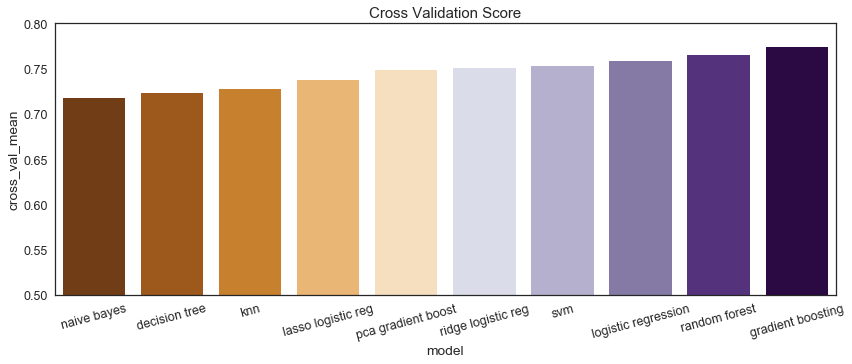

In [211]:
palette = ['#7f3b08','#b35806','#e08214','#fdb863','#fee0b6','#d8daeb','#b2abd2','#8073ac','#542788','#2d004b']
sns.set_palette(palette)
plt.figure(figsize=(14,5))

sns.barplot(x="model", y="cross_val_mean", data=results.sort_values('cross_val_mean'))
plt.xticks(rotation=15)
plt.ylim(.5, .8)
plt.title('Cross Validation Score')

plt.show()

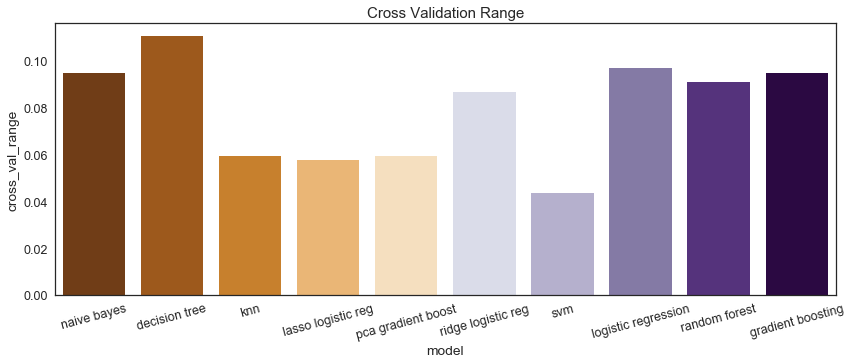

In [212]:
plt.figure(figsize=(14,5))
sns.barplot(x="model", y="cross_val_range", data=results.sort_values('cross_val_mean'))
plt.xticks(rotation=15)
#plt.ylim(.5, .8)
plt.title('Cross Validation Range')


plt.show()